In [1]:
# Installation of modules
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [2]:
# Moving Average Strategy for any stock. If the lower moving average is bigger than the higher moving average we buy else sell 
def strategy(ticker,n1,n2):
    df = pdr.get_data_yahoo(ticker, start='2010-01-01',end='2018-12-31')[['Adj Close']]
    df['return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
    df['mv1'] = df['Adj Close'].rolling(n1).mean()
    df['mv2'] = df['Adj Close'].rolling(n2).mean()
    df.dropna(inplace=True)
    df['position'] = np.where(df['mv1'] > df['mv2'], 1 , -1)
    df['strategy'] = df['position'].shift(1) * df['return']
    df[['return','strategy']].cumsum().apply(np.exp).sub(1).plot(figsize=(20, 10))
    plt.show()

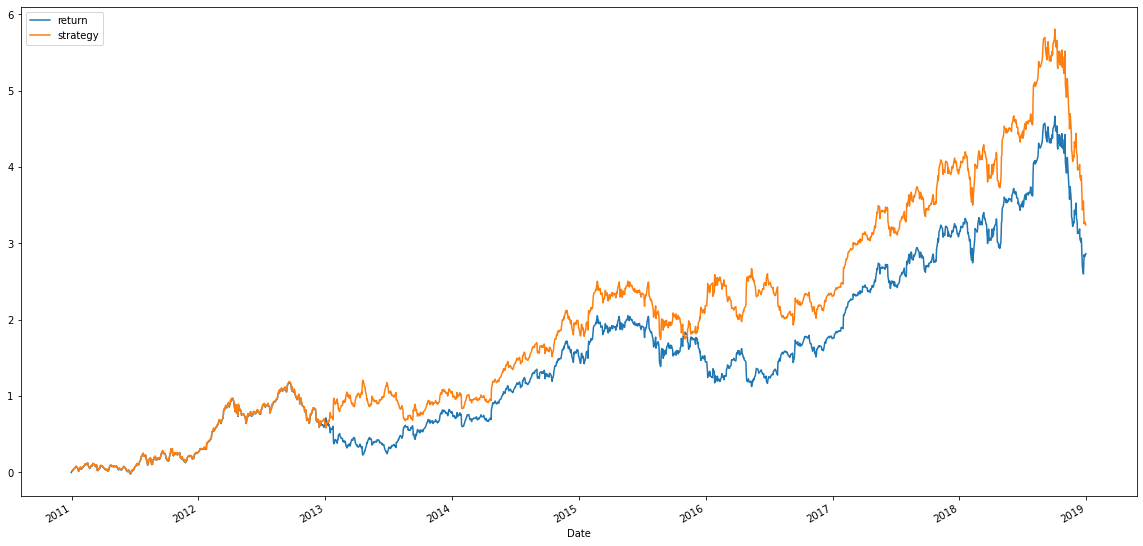

In [3]:
# example
strategy('AAPL',42,252)